Initial Weights: [0.417022   0.72032449]
Initial Bias: [0.00011437]

Epoch 1
Input: [0 0], Predicted: [1], Error: [-1]
Input: [0 1], Predicted: [1], Error: [-1]
Input: [1 0], Predicted: [1], Error: [-1]
Input: [1 1], Predicted: [1], Error: [0]

Epoch 2
Input: [0 0], Predicted: [0], Error: [0]
Input: [0 1], Predicted: [1], Error: [-1]
Input: [1 0], Predicted: [0], Error: [0]
Input: [1 1], Predicted: [1], Error: [0]

Epoch 3
Input: [0 0], Predicted: [0], Error: [0]
Input: [0 1], Predicted: [1], Error: [-1]
Input: [1 0], Predicted: [0], Error: [0]
Input: [1 1], Predicted: [1], Error: [0]

Epoch 4
Input: [0 0], Predicted: [0], Error: [0]
Input: [0 1], Predicted: [0], Error: [0]
Input: [1 0], Predicted: [0], Error: [0]
Input: [1 1], Predicted: [1], Error: [0]

Epoch 5
Input: [0 0], Predicted: [0], Error: [0]
Input: [0 1], Predicted: [0], Error: [0]
Input: [1 0], Predicted: [0], Error: [0]
Input: [1 1], Predicted: [1], Error: [0]

Epoch 6
Input: [0 0], Predicted: [0], Error: [0]
Input: [0 1]

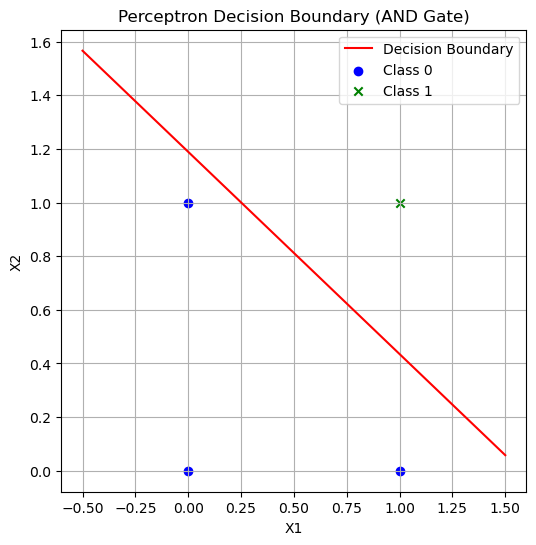

In [1]:
# ------------------------------------------------------------
# 1. Import libraries
# ------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # ✅ Correct import

# ------------------------------------------------------------
# 2. Input and Output data (AND gate)
# ------------------------------------------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([0, 0, 0, 1])

# ------------------------------------------------------------
# 3. Initialize weights, bias, and learning rate
# ------------------------------------------------------------
np.random.seed(1)              # reproducibility
weights = np.random.rand(2)    # two weights (for two inputs)
bias = np.random.rand(1)       # single bias
learning_rate = 0.1            # step size for updating weights

print("Initial Weights:", weights)
print("Initial Bias:", bias)

# ------------------------------------------------------------
# 4. Step Activation Function
# ------------------------------------------------------------
def step_function(X):
    return np.where(X >= 0, 1, 0)

# ------------------------------------------------------------
# 5. Training the Perceptron
# ------------------------------------------------------------
epochs = 10  # number of passes through the dataset

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}")
    for i in range(len(X)):
        # Linear combination of inputs and weights
        linear_output = np.dot(X[i], weights) + bias

        # Activation function output
        y_pred = step_function(linear_output)

        # Error = Actual - Predicted
        error = Y[i] - y_pred

        # Update rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

        print(f"Input: {X[i]}, Predicted: {y_pred}, Error: {error}")

print("\nFinal Weights:", weights)
print("Final Bias:", bias)

# ------------------------------------------------------------
# 6. Testing the trained perceptron
# ------------------------------------------------------------
print("\nTesting Perceptron after Training:")
for i in range(len(X)):
    y_pred = step_function(np.dot(X[i], weights) + bias)
    print(f"Input: {X[i]}, Output: {y_pred}")

# ------------------------------------------------------------
# 7. Visualizing the Decision Boundary
# ------------------------------------------------------------
X1 = np.linspace(-0.5, 1.5, 100)
X2 = -(weights[0] * X1 + bias) / weights[1]   # equation of line: w1*x1 + w2*x2 + b = 0

plt.figure(figsize=(6, 6))
plt.plot(X1, X2, 'r-', label='Decision Boundary')

# Plot the data points
for i in range(len(X)):
    if Y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='blue', marker='o', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='green', marker='x', label='Class 1' if i == 3 else "")

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Perceptron Decision Boundary (AND Gate)')
plt.grid(True)
plt.show()
